In [1]:
###Import Libraries 
### Data handling imports
import pandas as pd
import numpy as np

### Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

from pandas.core.reshape.pivot import pivot_table

# Advanced plotting... Plotly
from plotly import tools
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# Statistics imports
import scipy, scipy.stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag

%matplotlib inline

# df.head() displays all the columns without truncating
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
### Design Settings
# Plot bar graphs
def pretty_bar(data, ax, xlabel=None, ylabel=None, title=None, int_text=False):
    
    # Plots the data
    fig = sns.barplot(data.values, data.index, ax=ax)
    
    # Places text for each value in data
    for i, v in enumerate(data.values):
        
        # Decides whether the text should be rounded or left as floats
        if int_text:
            ax.text(0, i, int(v), color='k', fontsize=12)
        else:
            ax.text(0, i, round(v, 3), color='k', fontsize=12)
     
    ### Labels plot
    ylabel != None and fig.set(ylabel=ylabel)
    xlabel != None and fig.set(xlabel=xlabel)
    title != None and fig.set(title=title)

    
### Style Python print statements
class color:
    BOLD = '\033[1m'
    UNDERLINE = '\033[3m'
    END = '\033[0m'

In [3]:
###Load the Data into Pandas
usa_census = pd.read_csv('OneDrive/Desktop/ProjectITU/Census/2015 and 2017 US census/acs2017_bystates_data_ProjectITU.csv')
usa_census.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,1407,67826,14560,33018,6294,10.7,20.8,38.5,15.6,22.8,10.8,12.4,94.2,3.3,0.0,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,1652,41287,3819,18996,2453,22.4,35.8,30.5,24.9,22.9,6.3,15.4,90.5,9.1,0.0,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,2480,46806,9496,21236,2562,14.7,21.1,27.9,19.4,33.3,9.9,9.6,88.3,8.4,0.0,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,3257,55895,4369,28068,3190,2.3,1.7,29.0,16.6,25.8,9.1,19.5,82.3,11.2,0.0,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,0.0,7229,68143,14424,36905,10706,12.2,17.9,48.8,13.8,20.5,3.5,13.4,86.9,11.2,0.0,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [4]:
usa_census.tail(2)

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
72882,72153750601,Puerto Rico,Yauco Municipio,4380,1964,2416,100.0,0.0,0.0,0.0,0.0,0.0,3346,18688,4501,8331,1280,50.1,58.0,29.8,20.6,28.8,13.9,6.9,97.1,1.8,1.1,0.0,0.0,0.0,24.1,1062,67.7,30.4,1.9,0.0,29.5
72883,72153750602,Puerto Rico,Yauco Municipio,3001,1343,1658,99.2,0.8,0.0,0.0,0.0,0.0,2641,9458,3332,6251,1683,69.4,72.2,12.4,23.8,19.1,17.8,26.9,79.6,5.6,1.0,4.9,0.0,8.9,21.6,759,75.9,19.1,5.0,0.0,17.9


In [5]:
usa_census = usa_census.drop(columns=['TractId', 'VotingAgeCitizen'])

In [6]:
usa_census = usa_census.dropna()
print("Shape of dataset", usa_census.shape)
print("Columns", usa_census.columns)
usa_census.head()

Shape of dataset (72718, 35)
Columns Index(['State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White',
       'Black', 'Native', 'Asian', 'Pacific', 'Income', 'IncomeErr',
       'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment'],
      dtype='object')


,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,67826,14560,33018,6294,10.7,20.8,38.5,15.6,22.8,10.8,12.4,94.2,3.3,0.0,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,41287,3819,18996,2453,22.4,35.8,30.5,24.9,22.9,6.3,15.4,90.5,9.1,0.0,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,46806,9496,21236,2562,14.7,21.1,27.9,19.4,33.3,9.9,9.6,88.3,8.4,0.0,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,55895,4369,28068,3190,2.3,1.7,29.0,16.6,25.8,9.1,19.5,82.3,11.2,0.0,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,0.0,68143,14424,36905,10706,12.2,17.9,48.8,13.8,20.5,3.5,13.4,86.9,11.2,0.0,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [7]:
### Show unique datas
usa_census["State"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

In [8]:
# get column name and data types to make sure the types are right, results looking good.  
usa_census.dtypes

State               object
County              object
TotalPop             int64
Men                  int64
Women                int64
Hispanic           float64
White              float64
Black              float64
Native             float64
Asian              float64
Pacific            float64
Income               int64
IncomeErr            int64
IncomePerCap         int64
IncomePerCapErr      int64
Poverty            float64
ChildPoverty       float64
Professional       float64
Service            float64
Office             float64
Construction       float64
Production         float64
Drive              float64
Carpool            float64
Transit            float64
Walk               float64
OtherTransp        float64
WorkAtHome         float64
MeanCommute        float64
Employed             int64
PrivateWork        float64
PublicWork         float64
SelfEmployed       float64
FamilyWork         float64
Unemployment       float64
dtype: object

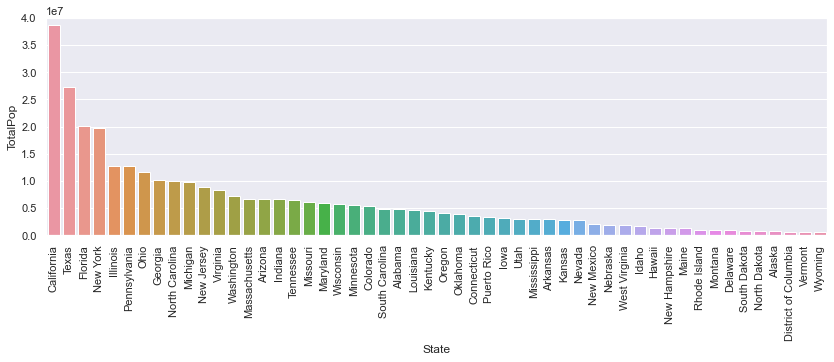

In [9]:
#Group by State

usastates= usa_census.groupby('State', as_index=False).sum()
usastates= usastates.sort_values('TotalPop', ascending = 0)

#Total population by country looks like below; 

fig, ax = plt.subplots(figsize=(14,4))
fig = sns.barplot(x = usastates['State'], y = usastates['TotalPop'], data=usastates)
fig.axis(ymin=0, ymax=40000000)
plt.xticks(rotation=90)
plt.show()

In [10]:
#We'll select the top 5 states for our analysis to be able to pick a homegenius data. 
# Create a new dataset which contains data of states with top 5 total population

ca = usa_census.groupby('State').get_group('California')
tx = usa_census.groupby('State').get_group('Texas')
fl = usa_census.groupby('State').get_group('Florida')
ny = usa_census.groupby('State').get_group('New York')
il = usa_census.groupby('State').get_group('Illinois')

usatop5states = pd.concat([ca, tx, fl, ny, il])
usatop5states.head()

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
3533,California,Alameda County,2991,1442,1549,3.8,69.2,2.8,0.0,16.2,0.0,208393,46352,115773,19839,4.2,8.4,72.4,8.1,15.6,1.5,2.5,52.4,10.6,14.3,0.5,2.2,20.0,34.8,1543,80.6,6.6,12.8,0.0,4.0
3534,California,Alameda County,1997,992,1005,8.9,71.3,0.9,0.3,9.8,0.0,147500,34827,80558,7558,5.5,1.9,75.7,5.9,11.6,4.7,2.0,43.9,3.8,31.1,4.4,5.0,11.8,29.2,1231,77.4,10.2,11.6,0.8,3.7
3535,California,Alameda County,5123,2383,2740,7.5,67.0,9.4,0.0,9.8,0.8,88173,11036,66529,13857,7.5,0.0,65.8,9.4,14.9,2.1,7.8,42.3,6.7,30.4,5.4,4.9,10.3,31.3,3213,73.0,17.8,9.2,0.0,5.5
3536,California,Alameda County,3991,1810,2181,9.4,65.8,6.0,0.3,12.1,0.0,102821,13517,62705,6602,9.2,9.5,79.2,6.6,11.8,1.1,1.3,38.5,8.3,27.1,4.3,12.8,9.1,30.4,2499,73.9,15.2,10.7,0.3,5.0
3537,California,Alameda County,3944,1660,2284,10.3,53.4,24.1,0.0,5.6,0.8,92375,18444,45313,4668,9.4,0.0,59.1,15.1,17.7,2.8,5.2,39.6,6.6,25.7,2.9,11.1,14.0,32.4,2587,77.1,14.1,8.8,0.0,2.6


In [11]:
#Lets see the correlations between the columns we have those're meaningful to correlate 
usatop5states.columns

Index(['State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White',
       'Black', 'Native', 'Asian', 'Pacific', 'Income', 'IncomeErr',
       'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment'],
      dtype='object')

In [12]:
# new dataframe with only columns with numbers

usatop5states = usatop5states[['Men', 'Women', 'Hispanic', 'White','Black', 'Native', 'Asian', 'Pacific', 'Income','IncomePerCap', 'Poverty', 'Unemployment']]
usatop5states.head(5)

,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Income,IncomePerCap,Poverty,Unemployment
3533,1442,1549,3.8,69.2,2.8,0.0,16.2,0.0,208393,115773,4.2,4.0
3534,992,1005,8.9,71.3,0.9,0.3,9.8,0.0,147500,80558,5.5,3.7
3535,2383,2740,7.5,67.0,9.4,0.0,9.8,0.8,88173,66529,7.5,5.5
3536,1810,2181,9.4,65.8,6.0,0.3,12.1,0.0,102821,62705,9.2,5.0
3537,1660,2284,10.3,53.4,24.1,0.0,5.6,0.8,92375,45313,9.4,2.6


<AxesSubplot:>

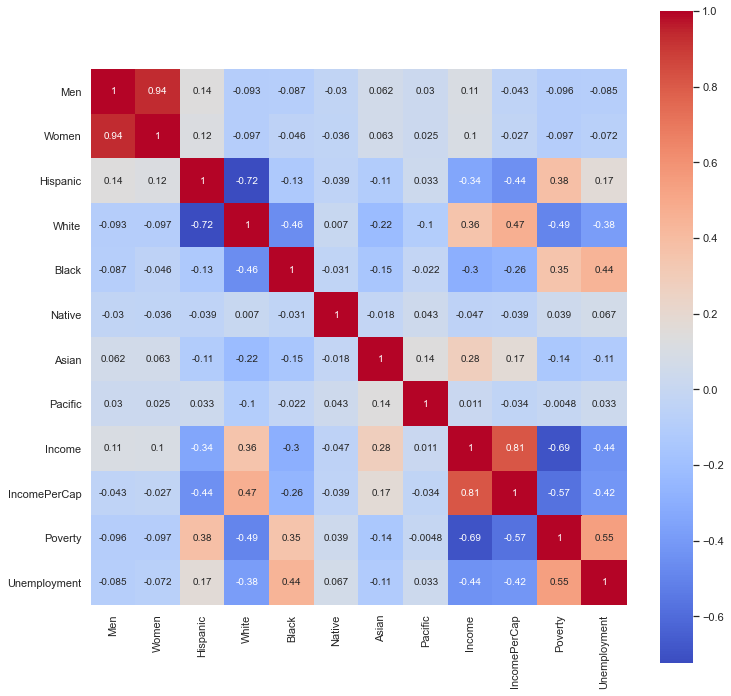

In [13]:
# Lets see how the categories for 'Men', 'Women', 'Hispanic', 'White',' Black', 'Native', 'Asian', 'Pacific', 'Income','IncomePerCap', 'Poverty', 'Unemployment' are related.

# correlation
plt.figure(figsize=(12,12))
sns.heatmap(usatop5states.corr(), annot=True, cmap="coolwarm", square=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

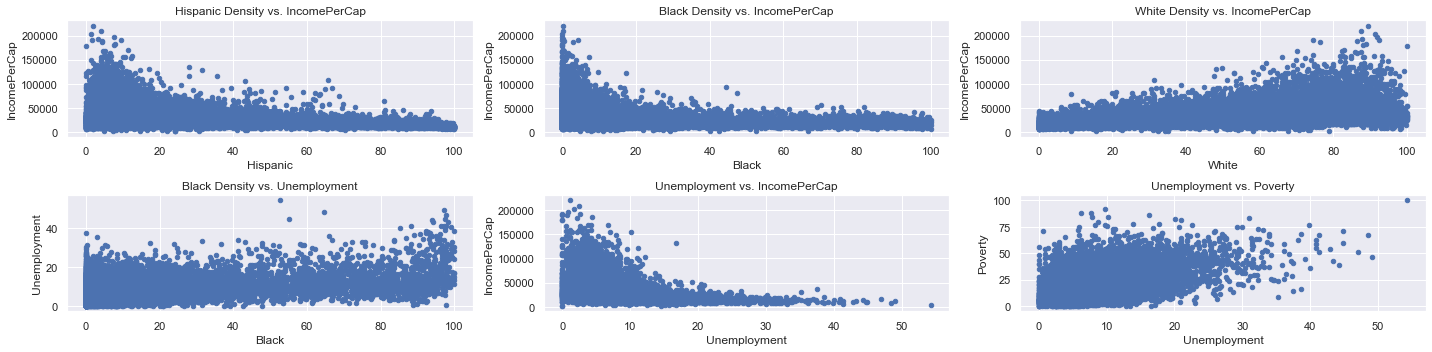

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(5)
fig.set_figwidth(20)

usatop5states.plot(ax=axes[0,0],x='Hispanic', y='IncomePerCap', kind = 'scatter', title = 'Hispanic Density vs. IncomePerCap')
usatop5states.plot(ax=axes[0,1],x='Black', y='IncomePerCap', kind = 'scatter', title = 'Black Density vs. IncomePerCap')
usatop5states.plot(ax=axes[0,2],x='White', y='IncomePerCap', kind = 'scatter', title = 'White Density vs. IncomePerCap')
usatop5states.plot(ax=axes[1,0],x='Black', y='Unemployment', kind = 'scatter', title = 'Black Density vs. Unemployment')
usatop5states.plot(ax=axes[1,1], x='Unemployment', y='IncomePerCap', kind = 'scatter', title = 'Unemployment vs. IncomePerCap')
usatop5states.plot(ax=axes[1,2], x='Unemployment', y='Poverty', kind = 'scatter', title = 'Unemployment vs. Poverty')

c=np.array([0.5, 0.5, 0.5]).reshape(1,-1)

plt.tight_layout()

In [15]:
#Further Regression Ananlyses based on above;
## Hispanic Density and Income per capita has negative correlation. XXX will be further analyzed XXX 1. Multivariable linear regression 
## Black Density and Income per capita has negative correlation. XXX will be further analyzed XXX 
## White Density and Income per capita has positive correlation. XXX will be further analyzed XXX
## Black Density and Unemployment has no correlation.
## Unemployment and Income per capita has negative correlation.
## Unemployment and Poverty has positive correlation. 

# get the summary
desc_usatop5states = usatop5states.describe()

# add the standard deviation metric
desc_usatop5states.loc['+3_std'] = desc_usatop5states.loc['mean'] + (desc_usatop5states.loc['std'] * 3)
desc_usatop5states.loc['-3_std'] = desc_usatop5states.loc['mean'] - (desc_usatop5states.loc['std'] * 3)

# display it
desc_usatop5states

,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Income,IncomePerCap,Poverty,Unemployment
count,25132.000000,25132.000000,25132.000000,25132.000000,25132.000000,25132.000000,25132.000000,25132.000000,25132.000000,25132.000000,25132.000000,25132.000000
mean,2326.048026,2399.503303,28.967587,49.003947,11.668299,0.280559,7.559016,0.139424,65149.966298,32176.881466,15.907703,7.366338
std,1239.297357,1265.250210,26.462118,30.597545,19.170817,1.454544,12.000834,0.612492,32610.528350,18764.483568,11.797869,4.638231
min,26.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4231.000000,1631.000000,0.000000,0.000000
25%,1529.750000,1588.000000,8.200000,19.875000,1.100000,0.000000,0.600000,0.000000,42007.000000,20067.750000,7.000000,4.300000
50%,2136.000000,2210.000000,19.300000,52.100000,3.900000,0.000000,2.900000,0.000000,57830.500000,27644.500000,12.800000,6.400000
75%,2865.250000,2962.000000,43.900000,76.000000,12.400000,0.200000,8.900000,0.000000,80552.250000,38443.500000,21.900000,9.300000
max,32266.000000,33262.000000,100.000000,100.000000,100.000000,81.200000,91.400000,16.000000,249750.000000,220253.000000,100.000000,54.300000
+3_std,6043.940098,6195.253934,108.353941,140.796581,69.180750,4.644190,43.561519,1.976901,162981.551347,88470.332171,51.301311,21.281030
-3_std,-1391.844045,-1396.247329,-50.418767,-42.788686,-45.844151,-4.083073,-28.443487,-1.698053,-32681.618751,-24116.569239,-19.485905,-6.548355


In [16]:
# get column name and data types to make sure the types are right, results looking good.  
usatop5states.dtypes

Men               int64
Women             int64
Hispanic        float64
White           float64
Black           float64
Native          float64
Asian           float64
Pacific         float64
Income            int64
IncomePerCap      int64
Poverty         float64
Unemployment    float64
dtype: object

In [18]:
#Build the Model

#let's split the data into a training and testing set; a healthy ratio is 20% testing and 80% training but a 30% 70% split is also ok.

from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = usatop5states[['Unemployment']]
Y = usatop5states[['Poverty']]

# Split X and y into X_
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

print("X shape : ", X.shape)
print("Y shape : ", Y.shape)
print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("===============================")
print("Y_train shape : ", Y_train.shape)
print("Y_test shape : ", Y_test.shape)

X shape :  (25132, 1)
Y shape :  (25132, 1)
X_train shape :  (20105, 1)
X_test shape :  (5027, 1)
Y_train shape :  (20105, 1)
Y_test shape :  (5027, 1)


In [19]:
Y_train.value_counts()

Poverty
4.2        119
6.7        118
6.8        117
7.5        113
4.5        111
          ... 
60.4         1
60.2         1
60.0         1
59.8         1
100.0        1
Length: 656, dtype: int64

In [20]:
Y_test.value_counts()

Poverty
4.5        35
4.7        33
7.2        33
4.2        32
7.1        32
           ..
46.2        1
46.0        1
45.8        1
45.7        1
88.2        1
Length: 536, dtype: int64

In [21]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [25]:
#Encode categorical variables

from sklearn import preprocessing

import xgboost as xgb

categorical = (['Unemployment', 'Poverty'])

num_class = len(y_train.unique())

for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])
        
xgb.XGBClassifier().fit(X_train,y_train,early_stopping_rounds=10,eval_metric="acc",eval_set=[(X_test,y_test)])

ModuleNotFoundError: No module named 'xgboost'

In [27]:
#label issue 
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(trainingScores)
>>> array([1.1, 2.2, 3.2, 1.0], dtype=float64)

print(utils.multiclass.type_of_target(trainingScores))
>>> continuous

print(utils.multiclass.type_of_target(trainingScores.astype('int')))
>>> multiclass

print(utils.multiclass.type_of_target(encoded))
>>> multiclass

SyntaxError: invalid syntax (<ipython-input-27-b8ff92c9d26b>, line 7)

In [26]:
#Logistic Regression model with the features determied

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

ValueError: Unknown label type: 'continuous'